In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv(r'C:\Users\alisa\OneDrive\Desktop\Energy Consumption prediction\Electricity consumption.csv')

In [77]:
data = data.drop(columns=['Unnamed: 0'])
# Drop the specified columns
del data["Start time UTC"]
del data["End time UTC"]
del data["Start time IST UTC+05:30"]

# Rename columns with exact names
data.rename(columns={"End time IST UTC+05:30": "DateTime",
                     "Electricity consumption in Odisha": "Consumption"}, inplace=True)

# Display the first few rows to verify the changes
print(data.head(5))
dataset = data
dataset["Month"] = pd.to_datetime(data["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(data["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(data["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(data["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(data["DateTime"]).dt.weekday
dataset["Day"] = pd.to_datetime(data["DateTime"]).dt.day_name()
dataset = data.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)
data.head()

   Consumption             DateTime
0      10800.0  2016-01-01 03:30:00
1      10431.0  2016-01-01 04:30:00
2      10005.0  2016-01-01 05:30:00
3       9722.0  2016-01-01 06:30:00
4       9599.0  2016-01-01 07:30:00


,Consumption,DateTime,Month,Year,Date,Time,Week,Day
0,10800.0,2016-01-01 03:30:00,1,2016,2016-01-01,03:30:00,4,Friday
1,10431.0,2016-01-01 04:30:00,1,2016,2016-01-01,04:30:00,4,Friday
2,10005.0,2016-01-01 05:30:00,1,2016,2016-01-01,05:30:00,4,Friday
3,9722.0,2016-01-01 06:30:00,1,2016,2016-01-01,06:30:00,4,Friday
4,9599.0,2016-01-01 07:30:00,1,2016,2016-01-01,07:30:00,4,Friday


In [78]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the 'Year' column
data['Year_scaled'] = scaler.fit_transform(data[['Year']])

print(data)


       Consumption             DateTime  Month  Year        Date      Time  \
0          10800.0  2016-01-01 03:30:00      1  2016  2016-01-01  03:30:00   
1          10431.0  2016-01-01 04:30:00      1  2016  2016-01-01  04:30:00   
2          10005.0  2016-01-01 05:30:00      1  2016  2016-01-01  05:30:00   
3           9722.0  2016-01-01 06:30:00      1  2016  2016-01-01  06:30:00   
4           9599.0  2016-01-01 07:30:00      1  2016  2016-01-01  07:30:00   
...            ...                  ...    ...   ...         ...       ...   
52961      11447.0  2021-12-31 22:30:00     12  2021  2021-12-31  22:30:00   
52962      11237.0  2021-12-31 23:30:00     12  2021  2021-12-31  23:30:00   
52963      10914.0  2022-01-01 00:30:00      1  2022  2022-01-01  00:30:00   
52964      10599.0  2022-01-01 01:30:00      1  2022  2022-01-01  01:30:00   
52965      10812.0  2022-01-01 02:30:00      1  2022  2022-01-01  02:30:00   

       Week       Day  Year_scaled  
0         4    Friday     

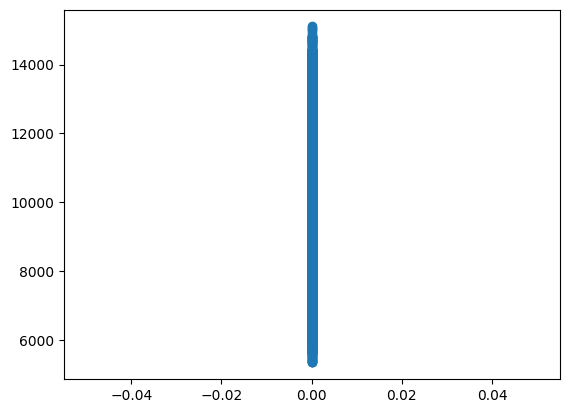

In [79]:
plt.scatter(data['Year_scaled']==2016,data['Consumption'])

In [80]:
data

,Consumption,DateTime,Month,Year,Date,Time,Week,Day,Year_scaled
0,10800.0,2016-01-01 03:30:00,1,2016,2016-01-01,03:30:00,4,Friday,0.000000
1,10431.0,2016-01-01 04:30:00,1,2016,2016-01-01,04:30:00,4,Friday,0.000000
2,10005.0,2016-01-01 05:30:00,1,2016,2016-01-01,05:30:00,4,Friday,0.000000
3,9722.0,2016-01-01 06:30:00,1,2016,2016-01-01,06:30:00,4,Friday,0.000000
4,9599.0,2016-01-01 07:30:00,1,2016,2016-01-01,07:30:00,4,Friday,0.000000
...,...,...,...,...,...,...,...,...,...
52961,11447.0,2021-12-31 22:30:00,12,2021,2021-12-31,22:30:00,4,Friday,0.833333
52962,11237.0,2021-12-31 23:30:00,12,2021,2021-12-31,23:30:00,4,Friday,0.833333
52963,10914.0,2022-01-01 00:30:00,1,2022,2022-01-01,00:30:00,5,Saturday,1.000000
52964,10599.0,2022-01-01 01:30:00,1,2022,2022-01-01,01:30:00,5,Saturday,1.000000


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Preprocess the data
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Day'] = LabelEncoder().fit_transform(data['Day'])  # Encode the categorical Day feature

# Define features (X) and target (y)
X = data[['Year', 'Year', 'Week', 'Day']]  # Using time-based features
y = data['Consumption']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.01, random_state=42)



In [96]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

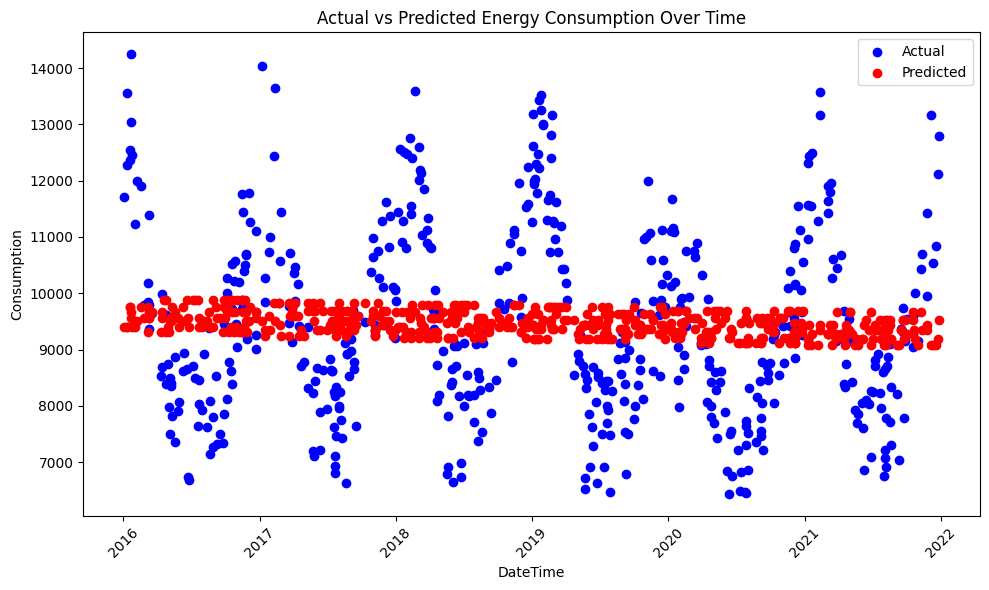

In [97]:
plt.figure(figsize=(10, 6))

# Actual consumption
plt.scatter(data['DateTime'].iloc[X_test.index], y_test, label="Actual", color="blue")

# Predicted consumption (from Linear Regression)
plt.scatter(data['DateTime'].iloc[X_test.index], lr.predict(X_test), label="Predicted", color="red")

# Labeling
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.title('Actual vs Predicted Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


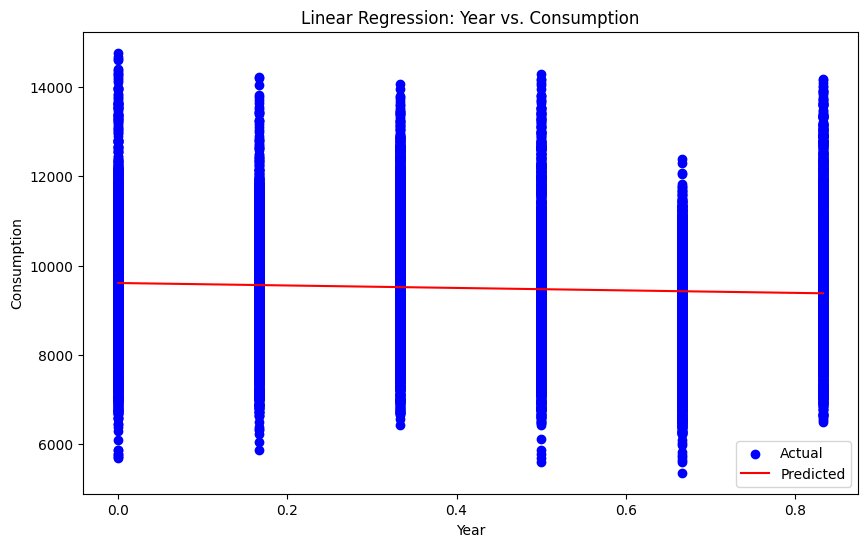

Coefficient (Slope): -276.67445609399965
Intercept: 9608.281188680528


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Selecting Year as feature and Consumption as target
X = data[['Year_scaled']]  # Feature (2D array)
y = data['Consumption']  # Target (1D array)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Actual consumption
plt.plot(X_test, y_pred, color='red', label='Predicted')  # Predicted consumption (linear regression)

# Labeling the plot
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Linear Regression: Year vs. Consumption')
plt.legend()
plt.show()

# Print the coefficients and intercept
print(f"Coefficient (Slope): {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_}")


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Preprocess the data
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Day'] = LabelEncoder().fit_transform(data['Day'])  # Encode the categorical Day feature

# Define features (X) and target (y)
X = data[['Month', 'Year', 'Week', 'Day']]  # Using time-based features
y = data['Consumption']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Dictionary to store model performances
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)  # Calculate R2 score
    model_performance[model_name] = {'RMSE': rmse, 'R2': r2}

model_performance


{'Linear Regression': {'RMSE': 1523.9307302282896, 'R2': 0.07593581975509889},
 'Decision Tree': {'RMSE': 763.55194583862, 'R2': 0.7680209001473158},
 'Random Forest': {'RMSE': 763.6149838207797, 'R2': 0.7679825947036922},
 'Gradient Boosting': {'RMSE': 779.8112057352031, 'R2': 0.7580360722727099},
 'SVR': {'RMSE': 1596.190699280484, 'R2': -0.013774199512703644}}